In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
pd.set_option('display.max_rows', 10)

# Adatok betöltése és formázása

In [2]:
oszlopnevek = ['1st_read_date', '1st_read_time', 'event', 'country', 'user_id', 'source', 'topic']
first_read = pd.read_csv('/home/kriszta/DILAN/read.csv', delimiter = ';', header = None, names=oszlopnevek)
first_read = first_read[first_read['source'].notna()]

In [3]:
oszlopnevek = ['read_date', 'read_time', 'event', 'country', 'user_id', 'source', 'topic']
read = pd.read_csv('/home/kriszta/DILAN/read.csv', delimiter = ';', header = None, names=oszlopnevek)
read = read[read['source'].isna()]

In [4]:
num_read = read.groupby('user_id')[['event']].count().reset_index()
num_read = num_read.rename(columns={'user_id': 'user_id', 'event': 'num_read'})

In [5]:
oszlopnevek2 = ['subs_date', 'subs_time', 'event', 'user_id']
subscribe = pd.read_csv('/home/kriszta/DILAN/subscribe.csv', delimiter = ';', header = None, names=oszlopnevek2)

In [6]:
subs = subscribe[['subs_date','user_id','event']]
subs = subs.rename(columns={'subs_date': 'subs_date', 'user_id': 'user_id', 'event': 'subs'})
subs = subs.replace('subscribe', 1)

In [7]:
oszlopnevek3 = ['buy_date', 'buy_time', 'event', 'user_id', 'price']
buy = pd.read_csv('/home/kriszta/DILAN/buy.csv', delimiter = ';', header = None, names=oszlopnevek3)

# Mire prediktáljunk?

In [8]:
tmp = subscribe.merge(buy, left_on = 'user_id', right_on = 'user_id')

tmp['subs_date'] = pd.to_datetime(tmp['subs_date'])
tmp['buy_date'] = pd.to_datetime(tmp['buy_date'])

for i in range(0,15):
    filtered_rows = tmp[(tmp.subs_date <= tmp.buy_date) & (tmp.buy_date <= (tmp.subs_date + pd.Timedelta(days=i)))]
    row_count = filtered_rows.shape[0]
    print(str(i) + ' nap elteltével a vásárlások száma: ' + str(row_count))

0 nap elteltével a vásárlások száma: 1410
1 nap elteltével a vásárlások száma: 2054
2 nap elteltével a vásárlások száma: 2447
3 nap elteltével a vásárlások száma: 2637
4 nap elteltével a vásárlások száma: 2748
5 nap elteltével a vásárlások száma: 2809
6 nap elteltével a vásárlások száma: 2832
7 nap elteltével a vásárlások száma: 2839
8 nap elteltével a vásárlások száma: 2843
9 nap elteltével a vásárlások száma: 2843
10 nap elteltével a vásárlások száma: 2843
11 nap elteltével a vásárlások száma: 2843
12 nap elteltével a vásárlások száma: 2843
13 nap elteltével a vásárlások száma: 2843
14 nap elteltével a vásárlások száma: 2843


### >> Tehát a feliratkozástól számítva nagyjából az első 7 nap az az időszak, amikor nő a vásárlások száma

In [9]:
subs_buy = subscribe.merge(buy, left_on = 'user_id', right_on = 'user_id')

subs_buy['subs_date'] = pd.to_datetime(subs_buy['subs_date'])
subs_buy['buy_date'] = pd.to_datetime(subs_buy['buy_date'])

purch_1_week = subs_buy[(subs_buy.subs_date <= subs_buy.buy_date) & (subs_buy.buy_date <= (subs_buy.subs_date + pd.Timedelta(days=7)))]
purch_1_week

,subs_date,subs_time,event_x,user_id,buy_date,buy_time,event_y,price
0,2018-01-01,02:56:58,subscribe,2458151468,2018-01-02,18:09:20,buy,80
1,2018-01-01,02:56:58,subscribe,2458151468,2018-01-02,19:08:12,buy,8
2,2018-01-01,03:58:02,subscribe,2458151555,2018-01-01,04:04:59,buy,8
4,2018-01-01,09:18:08,subscribe,2458151933,2018-01-01,09:28:00,buy,8
5,2018-01-01,09:40:18,subscribe,2458151970,2018-01-03,15:41:48,buy,80
...,...,...,...,...,...,...,...,...
6742,2018-03-30,05:30:17,subscribe,2458333140,2018-03-30,11:31:39,buy,80
6763,2018-03-30,11:26:58,subscribe,2458341594,2018-03-30,15:43:19,buy,8
6778,2018-03-30,15:02:19,subscribe,2458330984,2018-03-30,20:22:46,buy,80
6793,2018-03-30,17:39:26,subscribe,2458207349,2018-03-30,10:49:41,buy,80


In [10]:
purch_1_week = purch_1_week[['user_id','price']]
purch_1_week = purch_1_week.groupby('user_id')[['price']].count().reset_index()
purch_1_week = purch_1_week.rename(columns={'user_id': 'user_id', 'price': 'purch_1_week'})
purch_1_week = purch_1_week.replace(2, 1)
purch_1_week

,user_id,purch_1_week
0,2458151279,1
1,2458151323,1
2,2458151349,1
3,2458151364,1
4,2458151367,1
...,...,...
2277,2458339421,1
2278,2458339835,1
2279,2458340092,1
2280,2458341594,1


# known és unknown dataset definiálása

In [12]:
df = first_read.merge(num_read, how = 'inner', left_on = 'user_id', right_on = 'user_id')
df = df.merge(subs, how = 'inner', left_on = 'user_id', right_on = 'user_id')
df = df.merge(purch_1_week, how = 'left', left_on = 'user_id', right_on = 'user_id').fillna(0)

df = df[['subs_date', 'user_id', 'country', 'source', 'topic', 'num_read', 'purch_1_week']]
df['num_read'] = df['num_read'].astype(int)
df['purch_1_week'] = df['purch_1_week'].astype(int)

df

,subs_date,user_id,country,source,topic,num_read,purch_1_week
0,2018-01-01,2458151267,country_2,Reddit,Europe,1,0
1,2018-01-04,2458151279,country_4,SEO,North_America,11,1
2,2018-01-03,2458151287,country_5,SEO,North_America,6,0
3,2018-01-03,2458151302,country_5,SEO,Asia,5,0
4,2018-01-10,2458151303,country_4,Reddit,Asia,4,0
...,...,...,...,...,...,...,...
7418,2018-03-30,2458342659,country_5,Reddit,Europe,14,0
7419,2018-03-30,2458342889,country_5,Reddit,Asia,14,1
7420,2018-03-30,2458343139,country_5,Reddit,Asia,14,0
7421,2018-03-30,2458343185,country_2,SEO,North_America,14,0


In [13]:
df['subs_date'] = pd.to_datetime(df['subs_date'])
known = df[(df['subs_date'] >= '2018-01-01') & (df['subs_date'] <= '2018-03-23')]
unknown = df[(df['subs_date'] >= '2018-03-24') & (df['subs_date'] <= '2018-03-30')]

# Adatok előkészítése a RF-hez

In [14]:
known

,subs_date,user_id,country,source,topic,num_read,purch_1_week
0,2018-01-01,2458151267,country_2,Reddit,Europe,1,0
1,2018-01-04,2458151279,country_4,SEO,North_America,11,1
2,2018-01-03,2458151287,country_5,SEO,North_America,6,0
3,2018-01-03,2458151302,country_5,SEO,Asia,5,0
4,2018-01-10,2458151303,country_4,Reddit,Asia,4,0
...,...,...,...,...,...,...,...
6894,2018-03-23,2458317012,country_5,Reddit,Asia,15,0
6895,2018-03-22,2458317013,country_5,Reddit,Asia,22,1
6933,2018-03-23,2458318750,country_4,SEO,North_America,15,1
6959,2018-03-23,2458319673,country_5,Reddit,Asia,16,1


In [15]:
country_decoder = {'country_1': 0, 'country_2': 1, 'country_3': 2, 'country_4': 3, 
                   'country_5': 4, 'country_6': 5, 'country_7': 6, 'country_8': 7}
known.loc[:, 'country'] = known['country'].map(country_decoder)


source_decoder = {'SEO': 0, 'AdWords': 1, 'Reddit': 2}
known.loc[:, 'source'] = known['source'].map(source_decoder)


topic_decoder = {'Asia': 0, 'Africa': 1, 'Australia': 2, 
                 'South_America': 3, 'North_America': 4, 'Europe': 5}
known.loc[:, 'topic'] = known['topic'].map(topic_decoder)

known

/usr/lib/python3/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,subs_date,user_id,country,source,topic,num_read,purch_1_week
0,2018-01-01,2458151267,1,2,5,1,0
1,2018-01-04,2458151279,3,0,4,11,1
2,2018-01-03,2458151287,4,0,4,6,0
3,2018-01-03,2458151302,4,0,0,5,0
4,2018-01-10,2458151303,3,2,0,4,0
...,...,...,...,...,...,...,...
6894,2018-03-23,2458317012,4,2,0,15,0
6895,2018-03-22,2458317013,4,2,0,22,1
6933,2018-03-23,2458318750,3,0,4,15,1
6959,2018-03-23,2458319673,4,2,0,16,1


# RandomForestClassifier

In [16]:
x = known[['country', 'source', 'topic', 'num_read']]
y = known['purch_1_week']

In [17]:
model = RandomForestClassifier(n_estimators = 50)
model = model.fit(x, y)

In [18]:
model

RandomForestClassifier(n_estimators=50)

In [20]:
sample_user = [3,2,0,15]
model.predict([sample_user])

array([0])

In [21]:
for index, row in known.iterrows():
    print(model.predict([[row['country'], row['source'], row['topic'], row['num_read']]]))

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[0]
[1]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


# Ellenőrzés

In [22]:
known['predicted'] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
known

,subs_date,user_id,country,source,topic,num_read,purch_1_week,predicted
0,2018-01-01,2458151267,1,2,5,1,0,0
1,2018-01-04,2458151279,3,0,4,11,1,0
2,2018-01-03,2458151287,4,0,4,6,0,0
3,2018-01-03,2458151302,4,0,0,5,0,0
4,2018-01-10,2458151303,3,2,0,4,0,0
...,...,...,...,...,...,...,...,...
6894,2018-03-23,2458317012,4,2,0,15,0,0
6895,2018-03-22,2458317013,4,2,0,22,1,0
6933,2018-03-23,2458318750,3,0,4,15,1,0
6959,2018-03-23,2458319673,4,2,0,16,1,0


In [24]:
predicted_labels = []
for index, row in known.iterrows():
    predicted_label = model.predict([[row['country'], row['source'], row['topic'], row['num_read']]])[0]
    predicted_labels.append(predicted_label)

known['predicted'] = predicted_labels

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
known_check = known[['purch_1_week','predicted']]
known_check

,purch_1_week,predicted
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
6894,0,0
6895,1,1
6933,1,1
6959,1,0


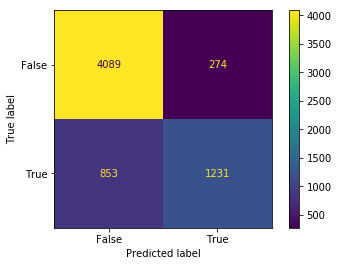

In [26]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = known_check['purch_1_week']
predicted = known_check['predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Prediktálás az unknown datasetben

In [27]:
unknown.head()

,subs_date,user_id,country,source,topic,num_read,purch_1_week
54,2018-03-24,2458151850,country_6,AdWords,Asia,17,0
108,2018-03-28,2458152350,country_7,Reddit,Asia,17,1
185,2018-03-28,2458153075,country_2,Reddit,Asia,18,1
322,2018-03-25,2458154506,country_5,SEO,North_America,14,0
325,2018-03-27,2458154552,country_7,SEO,North_America,13,0


In [28]:
country_decoder = {'country_1': 0, 'country_2': 1, 'country_3': 2, 'country_4': 3, 
                   'country_5': 4, 'country_6': 5, 'country_7': 6, 'country_8': 7}
unknown.loc[:, 'country'] = unknown['country'].map(country_decoder)


source_decoder = {'SEO': 0, 'AdWords': 1, 'Reddit': 2}
unknown.loc[:, 'source'] = unknown['source'].map(source_decoder)


topic_decoder = {'Asia': 0, 'Africa': 1, 'Australia': 2, 
                 'South_America': 3, 'North_America': 4, 'Europe': 5}
unknown.loc[:, 'topic'] = unknown['topic'].map(topic_decoder)

unknown

/usr/lib/python3/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,subs_date,user_id,country,source,topic,num_read,purch_1_week
54,2018-03-24,2458151850,5,1,0,17,0
108,2018-03-28,2458152350,6,2,0,17,1
185,2018-03-28,2458153075,1,2,0,18,1
322,2018-03-25,2458154506,4,0,4,14,0
325,2018-03-27,2458154552,6,0,4,13,0
...,...,...,...,...,...,...,...
7418,2018-03-30,2458342659,4,2,5,14,0
7419,2018-03-30,2458342889,4,2,0,14,1
7420,2018-03-30,2458343139,4,2,0,14,0
7421,2018-03-30,2458343185,1,0,4,14,0


In [29]:
unknown['predicted'] = 0
unknown.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,subs_date,user_id,country,source,topic,num_read,purch_1_week,predicted
54,2018-03-24,2458151850,5,1,0,17,0,0
108,2018-03-28,2458152350,6,2,0,17,1,0
185,2018-03-28,2458153075,1,2,0,18,1,0
322,2018-03-25,2458154506,4,0,4,14,0,0
325,2018-03-27,2458154552,6,0,4,13,0,0


In [30]:
predicted_labels = []
for index, row in unknown.iterrows():
    predicted_label = model.predict([[row['country'], row['source'], row['topic'], row['num_read']]])[0]
    predicted_labels.append(predicted_label)

unknown['predicted'] = predicted_labels

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
unknown

,subs_date,user_id,country,source,topic,num_read,purch_1_week,predicted
54,2018-03-24,2458151850,5,1,0,17,0,1
108,2018-03-28,2458152350,6,2,0,17,1,0
185,2018-03-28,2458153075,1,2,0,18,1,1
322,2018-03-25,2458154506,4,0,4,14,0,0
325,2018-03-27,2458154552,6,0,4,13,0,0
...,...,...,...,...,...,...,...,...
7418,2018-03-30,2458342659,4,2,5,14,0,0
7419,2018-03-30,2458342889,4,2,0,14,1,0
7420,2018-03-30,2458343139,4,2,0,14,0,0
7421,2018-03-30,2458343185,1,0,4,14,0,0


In [33]:
unknown_check = unknown[['purch_1_week','predicted']]
unknown_check

,purch_1_week,predicted
54,0,1
108,1,0
185,1,1
322,0,0
325,0,0
...,...,...
7418,0,0
7419,1,0
7420,0,0
7421,0,0


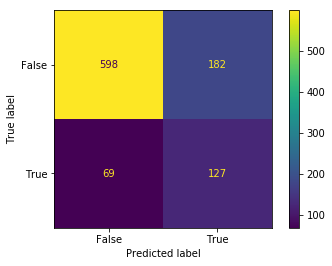

In [34]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = unknown_check['purch_1_week']
predicted = unknown_check['predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()